# Reward Training Analysis - Tone novelty

In [1]:
import os
import sys

PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(PROJECT_ROOT)

from rt_extension import Reward_Training
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt


In [3]:
# NAc
# experiment_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Reward_Training\Combined\Day_1\NAc"
experiment_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Reward_Training\Combined\Day10\NAc"
brain_region = '#15616F'

# mPFC
# experiment_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Reward_Training\Combined\Day_1\mPFC"
# experiment_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Reward_Training\Combined\Day10\mPFC"
# brain_region = '#FFAF00'

# NAc: #15616F
# mPFC: #FFAF00
save_path = r'graphs'


In [4]:
exp = Reward_Training(experiment_folder_path=experiment_path, behavior_folder_path=None)

Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Reward_Training\Combined\Day10\NAc\n5-240911-062153\Notes.txt
read from t=0s to t=1769.26s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Reward_Training\Combined\Day10\NAc\n6-240911-085311\Notes.txt
read from t=0s to t=1687.17s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Reward_Training\Combined\Day10\NAc\n7-240911-111928\Notes.txt
read from t=0s to t=1688.06s
read from t=0s to t=3853.09s
read from t=0s to t=3851.18s
read from t=0s to t=3845.28s
read from t=0s to t=3845.28s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Reward_Training\Combined\Day10\NAc\n5-240911-062153\Notes.txt
read from t=0s to t=1769.26s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Reward_Training\Comb

In [5]:
exp.trials

{'n5-240911-062153': <trial_class.Trial at 0x24a1e1c7a70>,
 'n6-240911-085311': <trial_class.Trial at 0x24a1e6ac2c0>,
 'n7-240911-111928': <trial_class.Trial at 0x24a1e411eb0>,
 'nn1_nn2-250202-133348': <trial_class.Trial at 0x24a1e71cef0>,
 'nn3_nn4-250202-122021': <trial_class.Trial at 0x24a1e3de510>,
 'nn5_nn6-250202-082015': <trial_class.Trial at 0x24a1ec84650>,
 'nn7_nn8-250202-070333': <trial_class.Trial at 0x24a1e3dfd70>,
 'nn1-250202-133348': <trial_class.Trial at 0x24a1e4c3710>,
 'nn2-250202-133348': <trial_class.Trial at 0x24a1e6d0860>,
 'nn3-250202-122021': <trial_class.Trial at 0x24a1ed5c4d0>,
 'nn4-250202-122021': <trial_class.Trial at 0x24a1ecd9580>,
 'nn5-250202-082015': <trial_class.Trial at 0x24a1e5c0ce0>,
 'nn6-250202-082015': <trial_class.Trial at 0x24a1ed5d9d0>,
 'nn7-250202-070333': <trial_class.Trial at 0x24a1ed5f050>,
 'nn8-250202-070333': <trial_class.Trial at 0x24a1ebbe2a0>}

In [6]:
exp.rtc_processing()
exp.create_base_df(experiment_path)

Processing trial n5-240911-062153...
Processing trial n6-240911-085311...
Processing trial n7-240911-111928...
Processing trial nn1_nn2-250202-133348...
Processing trial nn3_nn4-250202-122021...
Processing trial nn5_nn6-250202-082015...
Processing trial nn7_nn8-250202-070333...
Processing trial nn1-250202-133348...
Processing trial nn2-250202-133348...
Processing trial nn3-250202-122021...
Processing trial nn4-250202-122021...
Processing trial nn5-250202-082015...
Processing trial nn6-250202-082015...
Processing trial nn7-250202-070333...
Processing trial nn8-250202-070333...
Subdirectories: ['n5-240911-062153', 'n6-240911-085311', 'n7-240911-111928', 'nn1_nn2-250202-133348', 'nn3_nn4-250202-122021', 'nn5_nn6-250202-082015', 'nn7_nn8-250202-070333']


In [9]:
exp.find_first_lick_after_sound_cue().head()

,file name,trial,subject_name,sound cues,port entries,sound cues onset,port entries onset,port entries offset,first_lick_after_sound_cue
0,n5-240911-062153,<trial_class.Trial object at 0x0000024A1E1C7A70>,n5,"{'name': 'PC0/', 'onset': [0.0, 242.655232, 32...","{'name': 'PC3/', 'onset': [0.0, 182.65473024, ...","[242.655232, 322.65568256, 412.65610752, 492.6...","[182.65473024, 183.37480704, 184.29493248, 209...","[182.81480192, 184.2348032, 184.77481984, 209....","[246.655232, 326.65568256, 416.65610752, 496.6..."
1,n6-240911-085311,<trial_class.Trial object at 0x0000024A1E6AC2C0>,n6,"{'name': 'PC0/', 'onset': [0.0, 245.88271616, ...","{'name': 'PC3/', 'onset': [0.0, 198.45234688, ...","[245.88271616, 325.88316672, 415.88359168, 495...","[198.45234688, 198.57227776, 202.40236544, 202...","[198.50231808, 199.77240576, 202.61224448, 202...","[249.88271616, 329.88316672, 419.88359168, 499..."
2,n7-240911-111928,<trial_class.Trial object at 0x0000024A1E411EB0>,n7,"{'name': 'PC0/', 'onset': [0.0, 241.82915072, ...","{'name': 'PC3/', 'onset': [0.0, 183.70871296, ...","[241.82915072, 321.82960128, 411.83002624, 491...","[183.70871296, 188.21873664, 188.64898048, 209...","[186.83871232, 188.61867008, 190.3788032, 211....","[245.82915072, 325.82960128, 417.30015232, 495..."
3,nn1-250202-133348,<trial_class.Trial object at 0x0000024A1E4C3710>,nn1,"{'name': 'PC0/', 'onset': [0.0, 243.75033856, ...","{'name': 'PC2/', 'onset': [0.0, 183.75000064, ...","[243.75033856, 323.75095296, 413.75186944, 493...","[183.75000064, 186.32015872, 192.28000256, 192...","[184.10995712, 192.26001408, 192.36012032, 192...","[247.75033856, 327.75095296, 417.75186944, 497..."
4,nn2-250202-133348,<trial_class.Trial object at 0x0000024A1E6D0860>,nn2,"{'name': 'PC0/', 'onset': [0.0, 243.75033856, ...","{'name': 'PC3/', 'onset': [0.0, 183.75000064, ...","[243.75033856, 323.75095296, 413.75186944, 493...","[183.75000064, 189.8201088, 194.71007744, 202....","[188.83002368, 193.48013056, 200.0904192, 210....","[247.75033856, 327.75095296, 417.75186944, 497..."


## Finding DA metrics

In [10]:
exp.compute_EI_DA()
# exp.compute_standard_DA()

In [11]:
exp.df.head()

,file name,trial,subject_name,sound cues,port entries,sound cues onset,port entries onset,port entries offset,first_lick_after_sound_cue,Tone Event_Time_Axis,Tone Event_Zscore,Lick Event_Time_Axis,Lick Event_Zscore
0,n5-240911-062153,<trial_class.Trial object at 0x0000024A1E1C7A70>,n5,"{'name': 'PC0/', 'onset': [0.0, 242.655232, 32...","{'name': 'PC3/', 'onset': [0.0, 182.65473024, ...","[242.655232, 322.65568256, 412.65610752, 492.6...","[182.65473024, 183.37480704, 184.29493248, 209...","[182.81480192, 184.2348032, 184.77481984, 209....","[246.655232, 326.65568256, 416.65610752, 496.6...","[[-4.0, -3.9990169600200716, -3.99803392004014...","[[0.2839565174284196, 0.2781582709002605, 0.26...","[[0.0, 0.000983039979928435, 0.001966079959856...","[[-0.7019874286480747, -0.7028209335847851, -0..."
1,n6-240911-085311,<trial_class.Trial object at 0x0000024A1E6AC2C0>,n6,"{'name': 'PC0/', 'onset': [0.0, 245.88271616, ...","{'name': 'PC3/', 'onset': [0.0, 198.45234688, ...","[245.88271616, 325.88316672, 415.88359168, 495...","[198.45234688, 198.57227776, 202.40236544, 202...","[198.50231808, 199.77240576, 202.61224448, 202...","[249.88271616, 329.88316672, 419.88359168, 499...","[[-4.0, -3.9990169600200716, -3.99803392004014...","[[-1.0302633506737173, -1.0517381189515322, -1...","[[0.0, 0.000983039979928435, 0.001966079959856...","[[-0.4931698733582843, -0.504601273408369, -0...."
2,n7-240911-111928,<trial_class.Trial object at 0x0000024A1E411EB0>,n7,"{'name': 'PC0/', 'onset': [0.0, 241.82915072, ...","{'name': 'PC3/', 'onset': [0.0, 183.70871296, ...","[241.82915072, 321.82960128, 411.83002624, 491...","[183.70871296, 188.21873664, 188.64898048, 209...","[186.83871232, 188.61867008, 190.3788032, 211....","[245.82915072, 325.82960128, 417.30015232, 495...","[[-4.0, -3.9990169600200716, -3.99803392004014...","[[-0.7072173496209629, -0.7059622523942164, -0...","[[0.0, 0.000983039979928435, 0.001966079959856...","[[0.008122519474178524, 0.006844932528906267, ..."
3,nn1-250202-133348,<trial_class.Trial object at 0x0000024A1E4C3710>,nn1,"{'name': 'PC0/', 'onset': [0.0, 243.75033856, ...","{'name': 'PC2/', 'onset': [0.0, 183.75000064, ...","[243.75033856, 323.75095296, 413.75186944, 493...","[183.75000064, 186.32015872, 192.28000256, 192...","[184.10995712, 192.26001408, 192.36012032, 192...","[247.75033856, 327.75095296, 417.75186944, 497...","[[-4.0, -3.9990169600200716, -3.99803392004014...","[[0.15925080556125865, 0.15901178074646397, 0....","[[0.0, 0.000983039979928435, 0.001966079959856...","[[-1.8545784603816968, -1.8538351359338796, -1..."
4,nn2-250202-133348,<trial_class.Trial object at 0x0000024A1E6D0860>,nn2,"{'name': 'PC0/', 'onset': [0.0, 243.75033856, ...","{'name': 'PC3/', 'onset': [0.0, 183.75000064, ...","[243.75033856, 323.75095296, 413.75186944, 493...","[183.75000064, 189.8201088, 194.71007744, 202....","[188.83002368, 193.48013056, 200.0904192, 210....","[247.75033856, 327.75095296, 417.75186944, 497...","[[-4.0, -3.9990169600200716, -3.99803392004014...","[[0.5876166848936948, 0.5874294612807066, 0.58...","[[0.0, 0.000983039979928435, 0.001966079959856...","[[1.5932390235843972, 1.588223298160203, 1.580..."


In [ ]:
# exp.df['Lick AUC']
# Look at Rc_vs.RT code - obatin lick AUC / whatever. Use that to plot the lick AUC based on when it was received (Essentially old plot from old poster)

Code to look at a single trial DA response

In [ ]:
# # Select a trial (e.g., the first trial)
# trial = df.iloc[0]

# # Extract the first tone and lick responses (if multiple events exist)
# tone_time = trial['Tone Event_Time_Axis'][0]  # should be -pre_time to post_time
# tone_zscore = trial['Tone Event_Zscore'][0]
# lick_time = trial['Lick Event_Time_Axis'][0]  # should be 0 to post_time
# lick_zscore = trial['Lick Event_Zscore'][0]

# # Plotting both traces
# plt.figure(figsize=(8, 4))
# plt.plot(tone_time, tone_zscore, label='Tone Event (Sound Cue)')
# plt.plot(lick_time, lick_zscore, label='Lick Event')
# plt.axhline(0, color='gray', linestyle='--')
# plt.axvline(0, color='gray', linestyle='--')
# plt.xlabel('Time (s)')
# plt.ylabel('Baseline-corrected z-score')
# plt.title('Tone and Lick DA Responses')
# plt.legend()
# plt.show()


## PSTH For first and last tones

[DEBUG] PSTH: Plotting Tone event index 1 (0-indexed 0) for brain region NAc
[DEBUG] Row 0, subject n5: trace shape (14242,), first 5 values: [0.28395652 0.27815827 0.26935031 0.26050807 0.25170172]
[DEBUG] Row 1, subject n6: trace shape (14242,), first 5 values: [-1.03026335 -1.05173812 -1.07674439 -1.10065061 -1.12346165]
[DEBUG] Row 2, subject n7: trace shape (14242,), first 5 values: [-0.70721735 -0.70596225 -0.70213469 -0.69831267 -0.69449832]
[DEBUG] Row 3, subject nn1: trace shape (14242,), first 5 values: [0.15925081 0.15901178 0.15866817 0.15834731 0.15805386]
[DEBUG] Row 4, subject nn2: trace shape (14242,), first 5 values: [0.58761668 0.58742946 0.58723243 0.5871642  0.58722398]
[DEBUG] Row 5, subject nn3: trace shape (14242,), first 5 values: [-0.28286705 -0.28344995 -0.2870789  -0.29077258 -0.29453681]
[DEBUG] Row 6, subject nn4: trace shape (14242,), first 5 values: [-0.00497061 -0.00683905 -0.01838961 -0.02963019 -0.0405303 ]
[DEBUG] Row 7, subject nn5: trace shape (1424

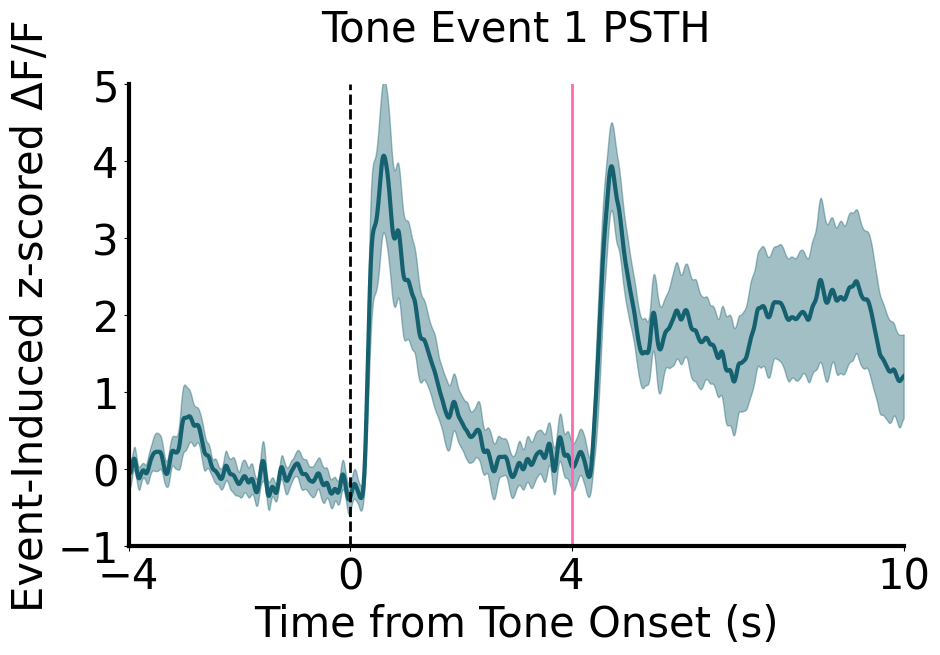

In [12]:
exp.plot_specific_event_psth(event_type='Tone', event_index = 1, directory_path=save_path, brain_region='NAc', y_min=-1, y_max=5, df=None, bin_size=100)
# exp.plot_specific_event_psth(event_type='Tone', event_index = 1, directory_path=save_path, brain_region='mPFC', y_min=-1, y_max=1.5, df=None, bin_size=100)

[DEBUG] PSTH: Plotting Tone event index 15 (0-indexed 14) for brain region NAc
[DEBUG] Row 0, subject n5: trace shape (14242,), first 5 values: [0.4505656  0.44624561 0.43996181 0.43367199 0.42737765]
[DEBUG] Row 1, subject n6: trace shape (14242,), first 5 values: [-0.05630778 -0.05627781 -0.05478999 -0.05295598 -0.05072015]
[DEBUG] Row 2, subject n7: trace shape (14242,), first 5 values: [0.56816067 0.567701   0.56679268 0.56583027 0.56481724]
[DEBUG] Row 3, subject nn1: trace shape (14242,), first 5 values: [-0.21648392 -0.21599998 -0.21505838 -0.21409751 -0.2131196 ]
[DEBUG] Row 4, subject nn2: trace shape (14242,), first 5 values: [-0.06228462 -0.05656137 -0.04555591 -0.03454288 -0.02352011]
[DEBUG] Row 5, subject nn3: trace shape (14242,), first 5 values: [-1.44514255 -1.44542066 -1.44691888 -1.44846771 -1.45006344]
[DEBUG] Row 6, subject nn4: trace shape (14242,), first 5 values: [0.45065532 0.44911478 0.4408391  0.43240544 0.42380773]
[DEBUG] Row 7, subject nn5: trace shape (14

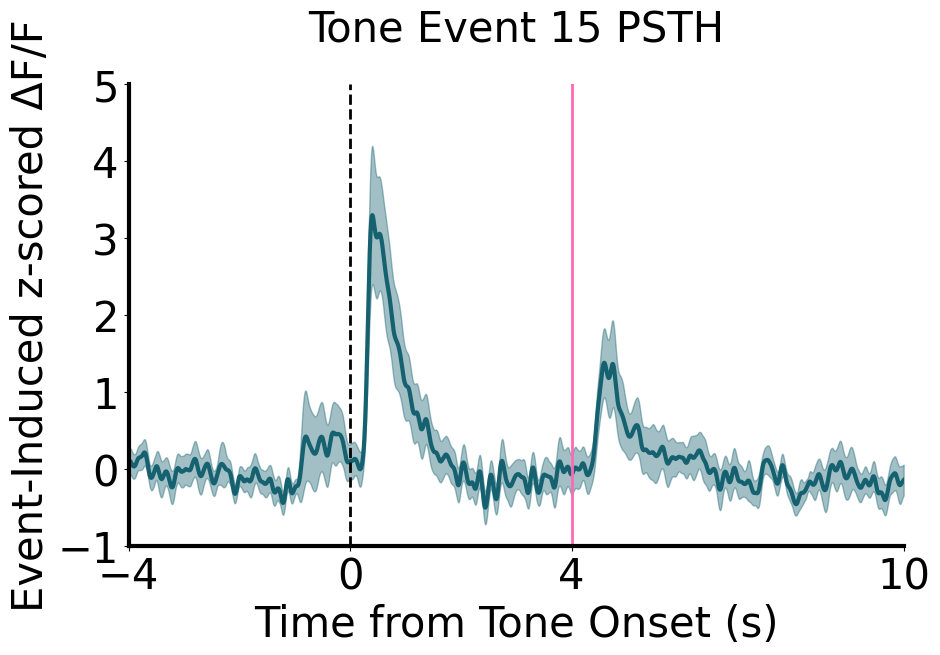

In [ ]:
exp.plot_specific_event_psth(event_type='Tone', event_index = 15, directory_path=save_path, brain_region='NAc', y_min=-1, y_max=5, df=None, bin_size=100)
# exp.plot_specific_event_psth(event_type='Tone', event_index = 15, directory_path=save_path, brain_region='mPFC', y_min=-1, y_max=2, df=None, bin_size=100)

## Heat maps

[DEBUG] Heatmap: Averaging Tone data for first 15 events in brain region NAc
[DEBUG] Row 0, subject n5, event 1: trace shape (14242,), first 5 values: [0.28395652 0.27815827 0.26935031 0.26050807 0.25170172]
[DEBUG] Row 1, subject n6, event 1: trace shape (14242,), first 5 values: [-1.03026335 -1.05173812 -1.07674439 -1.10065061 -1.12346165]
[DEBUG] Row 2, subject n7, event 1: trace shape (14242,), first 5 values: [-0.70721735 -0.70596225 -0.70213469 -0.69831267 -0.69449832]
[DEBUG] Row 3, subject nn1, event 1: trace shape (14242,), first 5 values: [0.15925081 0.15901178 0.15866817 0.15834731 0.15805386]
[DEBUG] Row 4, subject nn2, event 1: trace shape (14242,), first 5 values: [0.58761668 0.58742946 0.58723243 0.5871642  0.58722398]
[DEBUG] Row 5, subject nn3, event 1: trace shape (14242,), first 5 values: [-0.28286705 -0.28344995 -0.2870789  -0.29077258 -0.29453681]
[DEBUG] Row 6, subject nn4, event 1: trace shape (14242,), first 5 values: [-0.00497061 -0.00683905 -0.01838961 -0.0296

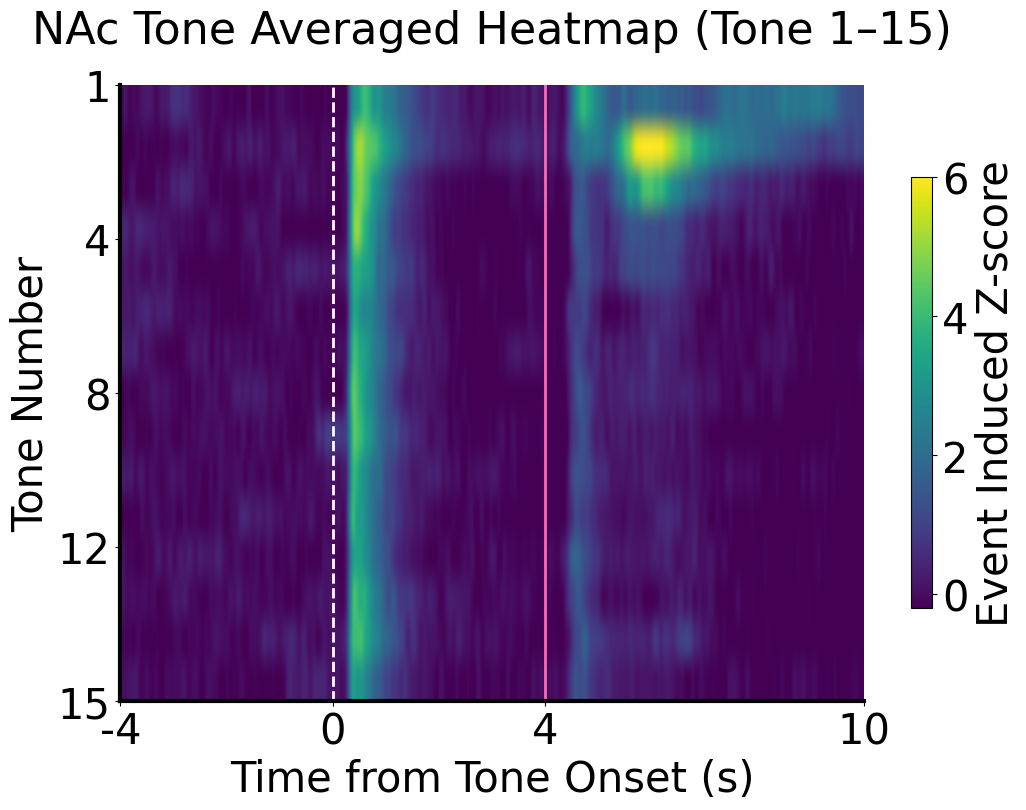

In [15]:
exp.plot_event_index_heatmap(event_type = 'Tone', 
                             max_events = 15, 
                             directory_path = save_path, 
                             brain_region = 'NAc', 
                             vmin = -0.2, 
                             vmax = 6, df=None, bin_size=100)

# exp.plot_event_index_heatmap(event_type = 'Tone', 
#                              max_events = 15, 
#                              directory_path = save_path,
#                              brain_region = 'mPFC', 
#                              vmin = -0.3, 
#                              vmax = 2, df=None, bin_size=100)

# To Do

### Mean DA Across Trials - Linear